<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/results/performance_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

In [1]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [2]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *

print('VOCAB TYPE:', VOCAB_TYPE)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
VOCAB TYPE: smiles


In [5]:
names_A3, names_T3, names_M5

(['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB'],
 ['hERG_Karim', 'AMES', 'LD50_Zhu'],
 ['CYP2C19_Veith',
  'CYP2D6_Veith',
  'CYP3A4_Veith',
  'CYP1A2_Veith',
  'CYP2C9_Veith'])

In [11]:
for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    print(model_type)
    for name in names_A3+names_T3+names_M5:
        # print(name)
        perfs = []
        for i in range(3):
            yml_file = f'ST/{name}/{model_type}_ST_{i}.yml'
            p = yml_report(yml_file, ver=False)
            perfs.append(p)
        eval_perf_list(perfs, name)

c_num = 6 # auc
r_num = 2 # rmse    print('\n\n')

MLP
repeated num # 3 idx 1 has the lowest loss
******************** PAMPA_NCATS ******************** 
	|       acc      |       auc      |       ap      
	&0.852$\pm$0.005  &0.764$\pm$0.009  &0.940$\pm$0.005  
 idx 1: &0.855            &0.777            &0.946            

repeated num # 3 idx 0 has the lowest loss
******************** Lipophilicity_AstraZeneca ******************** 
	|       mae      |       rmse      |       r2      
	&0.664$\pm$0.019  &0.882$\pm$0.019  &0.474$\pm$0.023  
 idx 0: &0.636            &0.855            &0.505            

repeated num # 3 idx 1 has the lowest loss
******************** Solubility_AqSolDB ******************** 
	|       mae      |       rmse      |       r2      
	&0.935$\pm$0.012  &1.286$\pm$0.016  &0.695$\pm$0.008  
 idx 1: &0.918            &1.273            &0.701            

repeated num # 3 idx 1 has the lowest loss
******************** hERG_Karim ******************** 
	|       acc      |       auc      |       ap      
	&0.790$\pm$0.

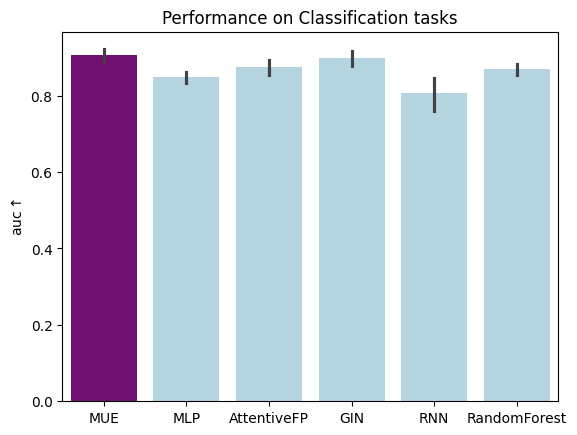

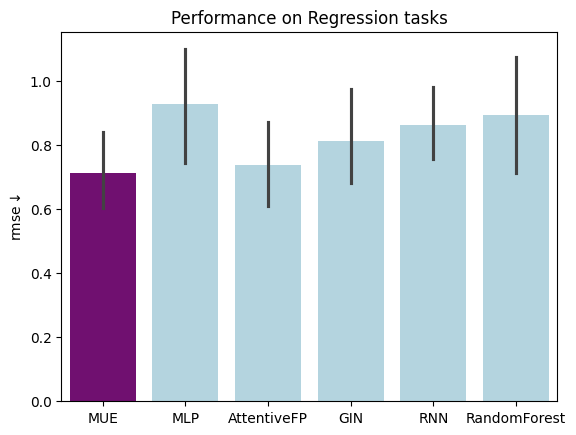

In [91]:
c_num = 6 # auc
r_num = 2 # rmse

dc = {}
dr = {}



# T3/uw/MUE_hERG_Karim_0.yml
mue_r, mue_c = [], []

for name in names_A3:
    is_r = names_dict[name]
    for i in range(3):
        yml_file = f'A3/uw/MUE_{name}_{i}.yml'
        p = yml_report(yml_file, ver=False)
        if is_r: # regression
            mue_r.append(p[name][r_num]) # RMSE
        else: # classification
            # print(p[name][6])
            mue_c.append(p[name][c_num]) # AUROC

for name in names_T3:
    is_r = names_dict[name]
    for i in range(3):
        yml_file = f'T3/uw/MUE_{name}_{i}.yml'
        p = yml_report(yml_file, ver=False)
        if is_r: # regression
            # print(p[name][2])
            mue_r.append(p[name][r_num]) # RMSE
        else: # classification
            # print(p[name][6])
            mue_c.append(p[name][c_num]) # AUROC

for name in names_M5:
    is_r = names_dict[name]
    for i in range(3):
        yml_file = f'M5/uw/MUE_{name}_{i}.yml'
        p = yml_report(yml_file, ver=False)
        if is_r: # regression
            # print(p[name][2])
            mue_r.append(p[name][r_num]) # RMSE
        else: # classification
            # print(p[name][6])
            mue_c.append(p[name][c_num]) # AUROC

dr['MUE'] = mue_r
dc['MUE'] = mue_c

for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
    # print(model_type)
    temp_list_c, temp_list_r = [], []
    for name in names_A3+names_T3+names_M5:
    # for name in names_A3+names_T3:

        # print(name)
        is_r = names_dict[name]
        # print(is_r)
        # perfs = []
        for i in range(3):
            yml_file = f'ST/{name}/{model_type}_ST_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                # print(p[name][2])
                temp_list_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                temp_list_c.append(p[name][c_num]) # AUROC
    dc[model_type] = temp_list_c
    dr[model_type] = temp_list_r


import pickle
save_path = 'RF'
rf_r, rf_c = [], []
for name in names_A3+names_T3+names_M5:
# for name in names_A3+names_T3:

        # print(name)
    is_r = names_dict[name]
    with open(f'{save_path}/{name}.pkl', 'rb') as f:
        data = pickle.load(f)
    for i in data:
        # print(i)
        if is_r: # regression
            rf_r.append(i[name][r_num])
        else:
            rf_c.append(i[name][c_num])

dr['RandomForest'] = rf_r
dc['RandomForest'] = rf_c

pd.DataFrame.from_dict(dr)

colors = ['purple']+['lightblue']*5
fig = sns.barplot(data=pd.DataFrame.from_dict(dc),
                  palette = colors)
# plt.xlabel("Models")
plt.ylabel(f'{cls_metrics[c_num]}'+r"$\uparrow$")
plt.title("Performance on Classification tasks")
plt.show(fig)
plt.close()

colors = ['purple']+['lightblue']*5
fig = sns.barplot(data=pd.DataFrame.from_dict(dr),
                  palette = colors)
# plt.xlabel("Models")
plt.ylabel(f'{reg_metrics[r_num]}'+r"$\downarrow$")
plt.title("Performance on Regression tasks")
plt.show(fig)

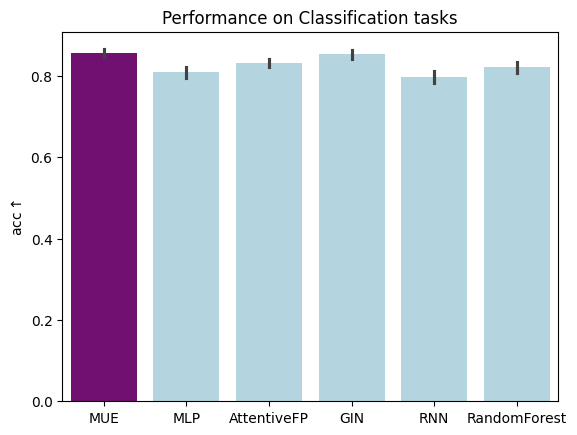

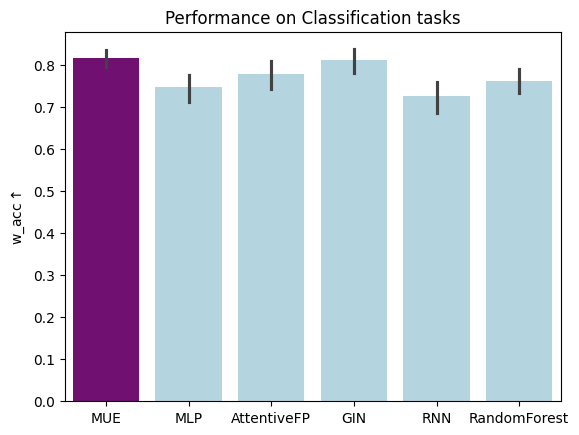

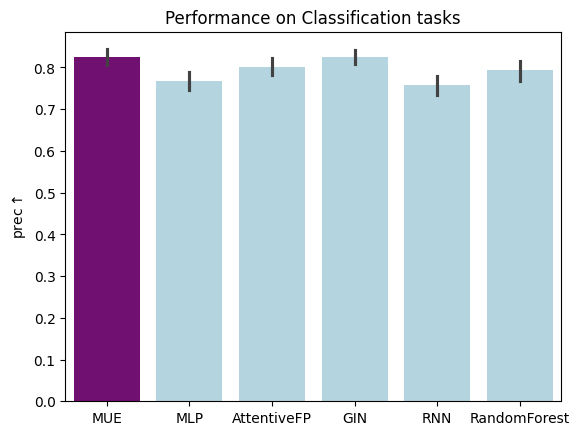

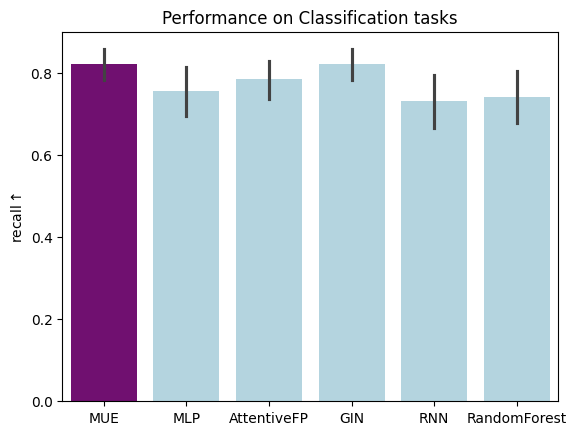

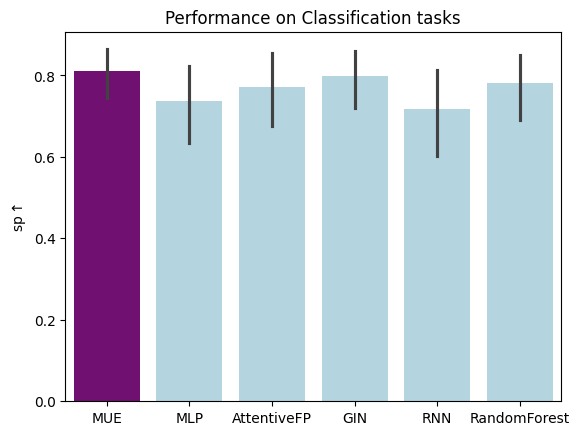

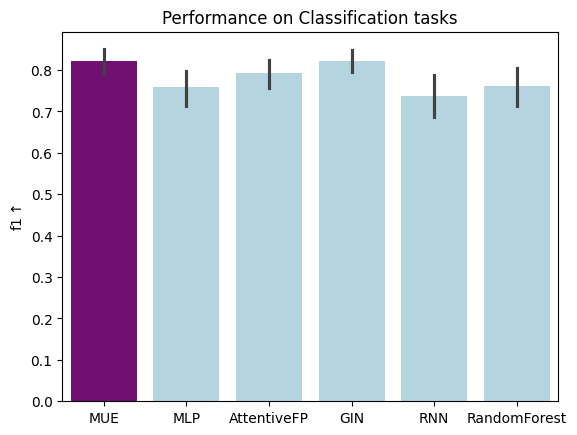

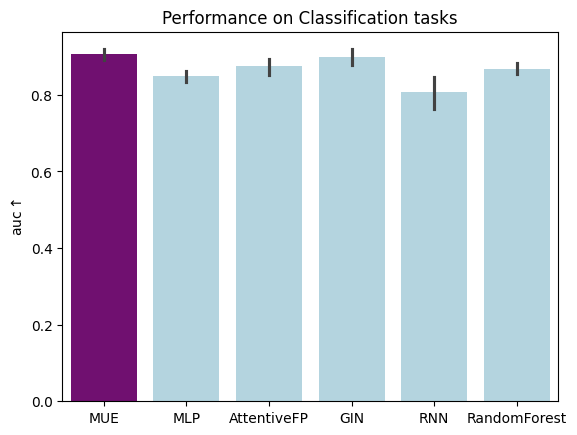

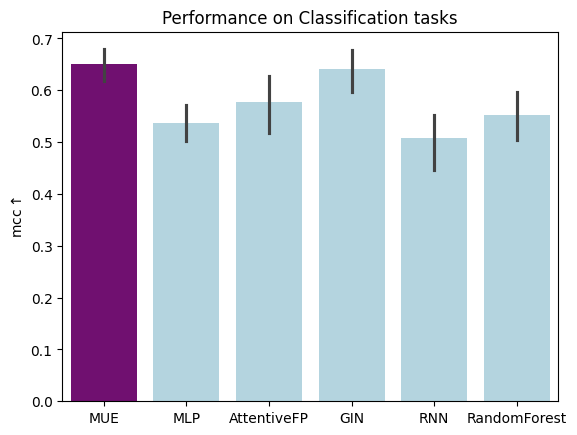

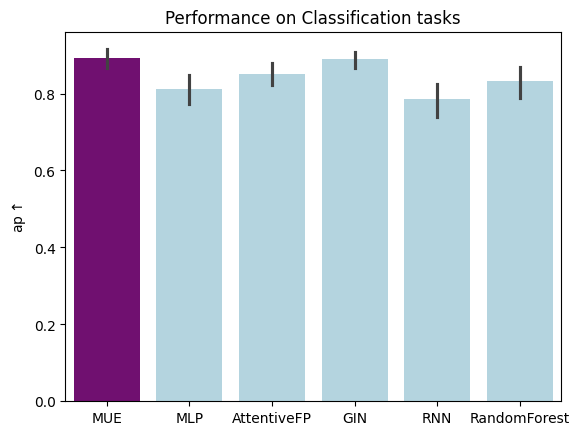

In [92]:

for c_num in range(len(cls_metrics)):
    dc = {}
    dr = {}



    # T3/uw/MUE_hERG_Karim_0.yml
    mue_r, mue_c = [], []

    for name in names_A3:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'A3/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    for name in names_T3:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'T3/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                # print(p[name][2])
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    for name in names_M5:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'M5/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                # print(p[name][2])
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    dr['MUE'] = mue_r
    dc['MUE'] = mue_c

    for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
        # print(model_type)
        temp_list_c, temp_list_r = [], []
        for name in names_A3+names_T3+names_M5:
        # for name in names_A3+names_T3:

            # print(name)
            is_r = names_dict[name]
            # print(is_r)
            # perfs = []
            for i in range(3):
                yml_file = f'ST/{name}/{model_type}_ST_{i}.yml'
                p = yml_report(yml_file, ver=False)
                if is_r: # regression
                    # print(p[name][2])
                    temp_list_r.append(p[name][r_num]) # RMSE
                else: # classification
                    # print(p[name][6])
                    temp_list_c.append(p[name][c_num]) # AUROC
        dc[model_type] = temp_list_c
        dr[model_type] = temp_list_r


    import pickle
    save_path = 'RF'
    rf_r, rf_c = [], []
    for name in names_A3+names_T3+names_M5:
    # for name in names_A3+names_T3:

            # print(name)
        is_r = names_dict[name]
        with open(f'{save_path}/{name}.pkl', 'rb') as f:
            data = pickle.load(f)
        for i in data:
            # print(i)
            if is_r: # regression
                rf_r.append(i[name][r_num])
            else:
                rf_c.append(i[name][c_num])

    dr['RandomForest'] = rf_r
    dc['RandomForest'] = rf_c

    pd.DataFrame.from_dict(dr)

    colors = ['purple']+['lightblue']*5
    fig = sns.barplot(data=pd.DataFrame.from_dict(dc),
                    palette = colors)
    # plt.xlabel("Models")
    plt.ylabel(f'{cls_metrics[c_num]}'+r"$\uparrow$")
    plt.title("Performance on Classification tasks")
    plt.show(fig)
    plt.close()

    # colors = ['purple']+['lightblue']*5
    # fig = sns.barplot(data=pd.DataFrame.from_dict(dr),
    #                 palette = colors)
    # # plt.xlabel("Models")
    # plt.ylabel(f'{reg_metrics[r_num]}'+r"$\downarrow$")
    # plt.title("Performance on Regression tasks")
    # plt.show(fig)

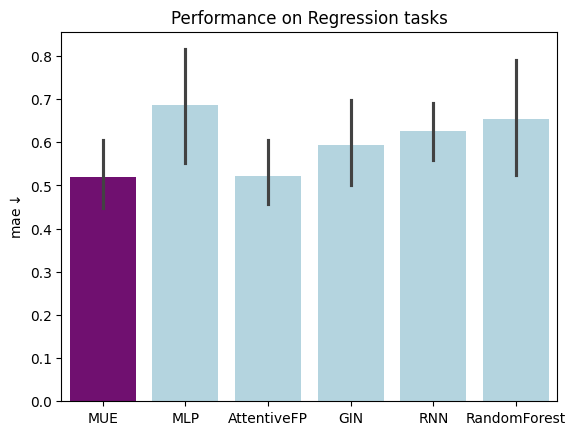

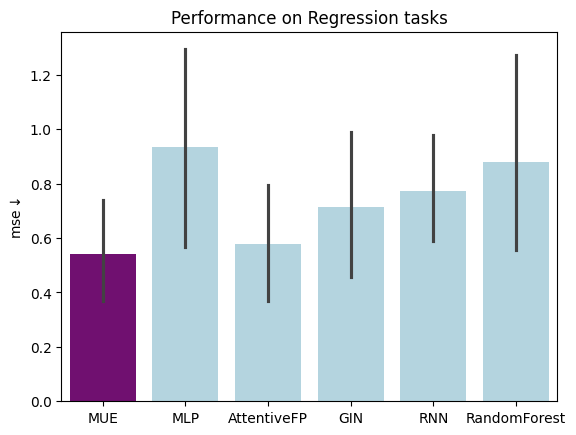

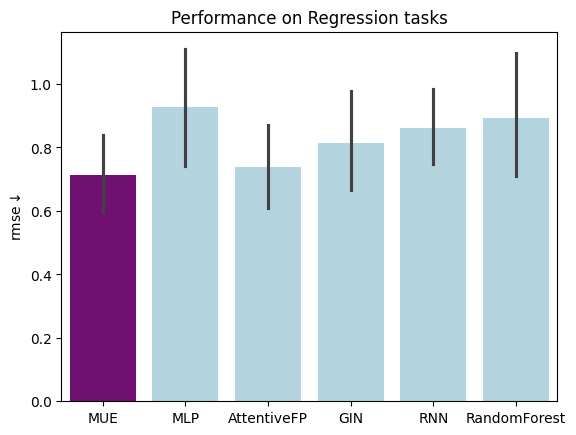

In [94]:

for r_num in range(len(reg_metrics[:3])):
    dc = {}
    dr = {}



    # T3/uw/MUE_hERG_Karim_0.yml
    mue_r, mue_c = [], []

    for name in names_A3:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'A3/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    for name in names_T3:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'T3/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                # print(p[name][2])
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    for name in names_M5:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'M5/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                # print(p[name][2])
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    dr['MUE'] = mue_r
    dc['MUE'] = mue_c

    for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
        # print(model_type)
        temp_list_c, temp_list_r = [], []
        for name in names_A3+names_T3+names_M5:
        # for name in names_A3+names_T3:

            # print(name)
            is_r = names_dict[name]
            # print(is_r)
            # perfs = []
            for i in range(3):
                yml_file = f'ST/{name}/{model_type}_ST_{i}.yml'
                p = yml_report(yml_file, ver=False)
                if is_r: # regression
                    # print(p[name][2])
                    temp_list_r.append(p[name][r_num]) # RMSE
                else: # classification
                    # print(p[name][6])
                    temp_list_c.append(p[name][c_num]) # AUROC
        dc[model_type] = temp_list_c
        dr[model_type] = temp_list_r


    import pickle
    save_path = 'RF'
    rf_r, rf_c = [], []
    for name in names_A3+names_T3+names_M5:
    # for name in names_A3+names_T3:

            # print(name)
        is_r = names_dict[name]
        with open(f'{save_path}/{name}.pkl', 'rb') as f:
            data = pickle.load(f)
        for i in data:
            # print(i)
            if is_r: # regression
                rf_r.append(i[name][r_num])
            else:
                rf_c.append(i[name][c_num])

    dr['RandomForest'] = rf_r
    dc['RandomForest'] = rf_c

    pd.DataFrame.from_dict(dr)

    # colors = ['purple']+['lightblue']*5
    # fig = sns.barplot(data=pd.DataFrame.from_dict(dc),
    #                 palette = colors)
    # # plt.xlabel("Models")
    # plt.ylabel(f'{cls_metrics[c_num]}'+r"$\uparrow$")
    # plt.title("Performance on Classification tasks")
    # plt.show(fig)
    # plt.close()

    colors = ['purple']+['lightblue']*5
    fig = sns.barplot(data=pd.DataFrame.from_dict(dr),
                    palette = colors)
    # plt.xlabel("Models")
    plt.ylabel(f'{reg_metrics[r_num]}'+r"$\downarrow$")
    plt.title("Performance on Regression tasks")
    plt.show(fig)

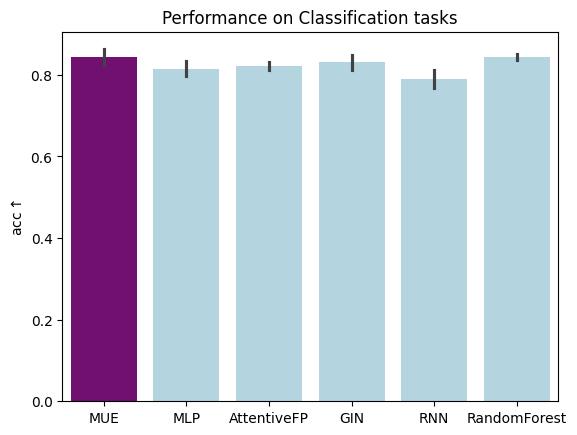

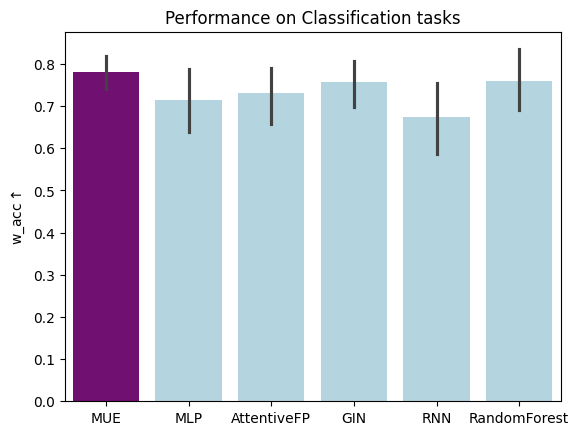

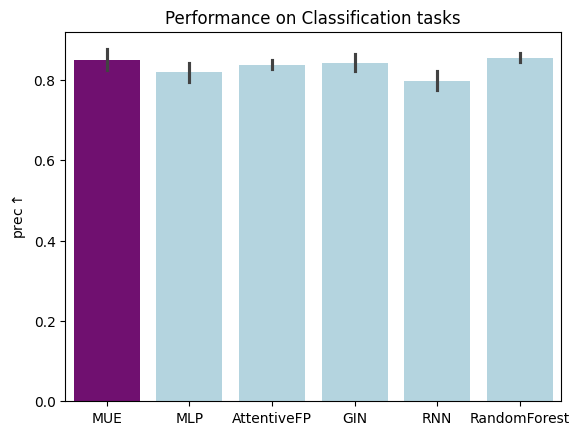

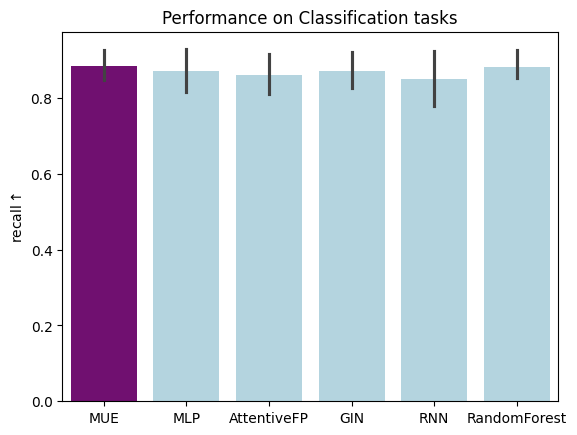

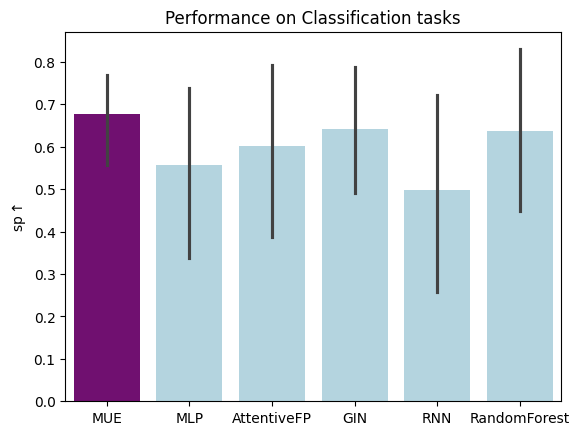

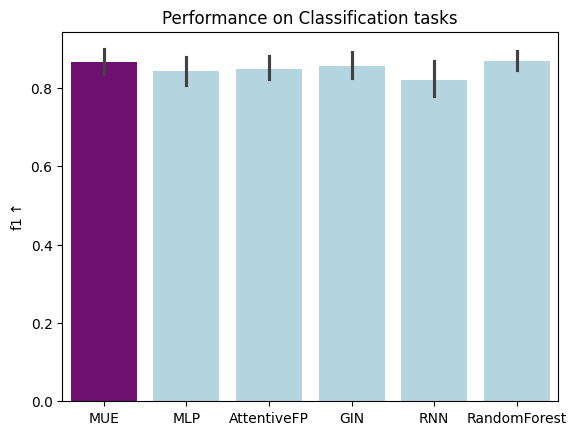

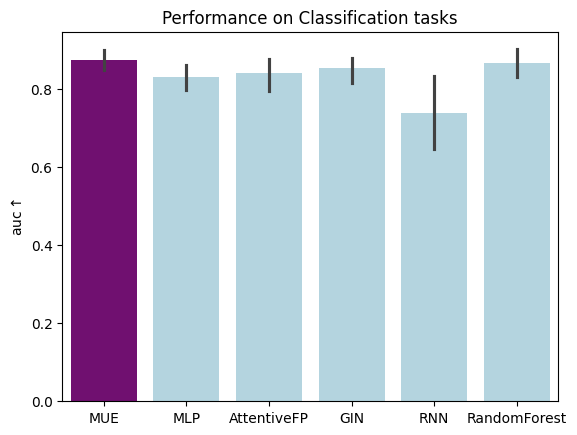

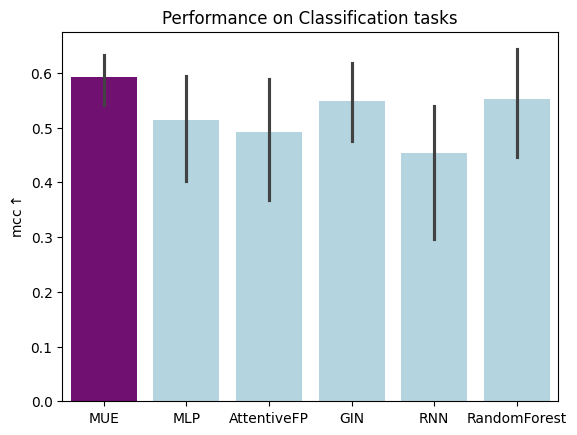

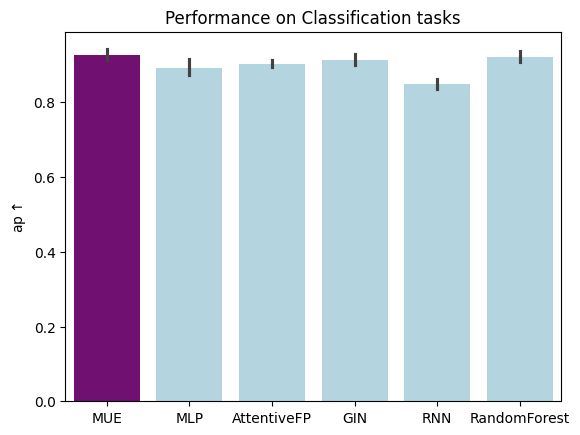

In [95]:

for c_num in range(len(cls_metrics)):
    dc = {}
    dr = {}

    # T3/uw/MUE_hERG_Karim_0.yml
    mue_r, mue_c = [], []

    for name in names_A3:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'A3/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    for name in names_T3:
        is_r = names_dict[name]
        for i in range(3):
            yml_file = f'T3/uw/MUE_{name}_{i}.yml'
            p = yml_report(yml_file, ver=False)
            if is_r: # regression
                # print(p[name][2])
                mue_r.append(p[name][r_num]) # RMSE
            else: # classification
                # print(p[name][6])
                mue_c.append(p[name][c_num]) # AUROC

    # for name in names_M5:
    #     is_r = names_dict[name]
    #     for i in range(3):
    #         yml_file = f'M5/uw/MUE_{name}_{i}.yml'
    #         p = yml_report(yml_file, ver=False)
    #         if is_r: # regression
    #             # print(p[name][2])
    #             mue_r.append(p[name][r_num]) # RMSE
    #         else: # classification
    #             # print(p[name][6])
    #             mue_c.append(p[name][c_num]) # AUROC

    dr['MUE'] = mue_r
    dc['MUE'] = mue_c

    for model_type in ['MLP', 'AttentiveFP', 'GIN', 'RNN']:
        # print(model_type)
        temp_list_c, temp_list_r = [], []
        # for name in names_A3+names_T3+names_M5:
        for name in names_A3+names_T3:

            # print(name)
            is_r = names_dict[name]
            # print(is_r)
            # perfs = []
            for i in range(3):
                yml_file = f'ST/{name}/{model_type}_ST_{i}.yml'
                p = yml_report(yml_file, ver=False)
                if is_r: # regression
                    # print(p[name][2])
                    temp_list_r.append(p[name][r_num]) # RMSE
                else: # classification
                    # print(p[name][6])
                    temp_list_c.append(p[name][c_num]) # AUROC
        dc[model_type] = temp_list_c
        dr[model_type] = temp_list_r


    import pickle
    save_path = 'RF'
    rf_r, rf_c = [], []
    # for name in names_A3+names_T3+names_M5:
    for name in names_A3+names_T3:

            # print(name)
        is_r = names_dict[name]
        with open(f'{save_path}/{name}.pkl', 'rb') as f:
            data = pickle.load(f)
        for i in data:
            # print(i)
            if is_r: # regression
                rf_r.append(i[name][r_num])
            else:
                rf_c.append(i[name][c_num])

    dr['RandomForest'] = rf_r
    dc['RandomForest'] = rf_c

    pd.DataFrame.from_dict(dr)

    colors = ['purple']+['lightblue']*5
    fig = sns.barplot(data=pd.DataFrame.from_dict(dc),
                    palette = colors)
    # plt.xlabel("Models")
    plt.ylabel(f'{cls_metrics[c_num]}'+r"$\uparrow$")
    plt.title("Performance on Classification tasks")
    plt.show(fig)
    plt.close()

    # colors = ['purple']+['lightblue']*5
    # fig = sns.barplot(data=pd.DataFrame.from_dict(dr),
    #                 palette = colors)
    # # plt.xlabel("Models")
    # plt.ylabel(f'{reg_metrics[r_num]}'+r"$\downarrow$")
    # plt.title("Performance on Regression tasks")
    # plt.show(fig)

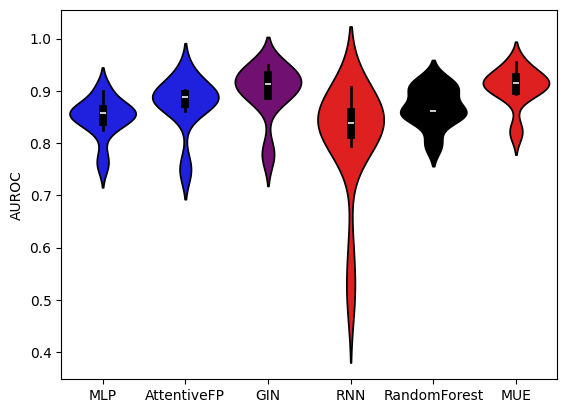

In [62]:
fig = sns.violinplot(data=pd.DataFrame.from_dict(dc), palette = ['blue', 'blue', 'purple', 'red', 'black', 'red'])
# plt.xlabel("Models")
plt.ylabel("AUROC")
# plt.title("Colors vs Values") # You can comment this line out if you don't need title
plt.show(fig)

<Axes: >

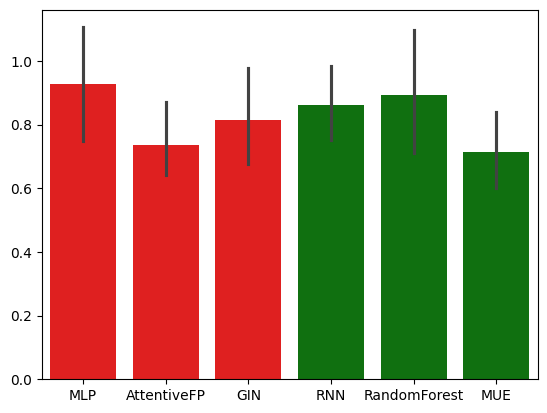

In [53]:
cols = ['red' if x < 0.88 else 'green' for x in pd.DataFrame.from_dict(dr).MUE]
sns.barplot(data=pd.DataFrame.from_dict(dr), palette=cols)

In [27]:



for name in names_cls:

    with open(f'{save_path}/{name}.pkl', 'rb') as f:
        data = pickle.load(f)
        print(data)
        for i in data:

        eval_perf_list(data, name)
        print('\n')
        break

[{'CYP2C19_Veith': [0.7773391235688907, 0.7772062561585631, 0.7485477178423237, 0.7755803955288049, 0.7788321167883212, 0.7618243243243243, 0.8538432571188281, 0.5532107402802563, 0.8069413015986346]}, {'CYP2C19_Veith': [0.7797078562968812, 0.7795909145113005, 0.7510373443983402, 0.7781599312123818, 0.781021897810219, 0.764358108108108, 0.8541576968700378, 0.557969718778486, 0.808471047380815]}, {'CYP2C19_Veith': [0.7840505329648638, 0.7838653494925658, 0.7562396006655574, 0.7815993121238177, 0.7861313868613139, 0.7687103594080339, 0.8548750713922589, 0.5665669774257646, 0.8087742835303967]}]
******************** CYP2C19_Veith ******************** 
	|       acc      |       auc      |       ap      
	&0.780$\pm$0.003  &0.854$\pm$0.000  &0.808$\pm$0.001  





In [ ]:
import pickle
save_path = 'RF'
rf_r, rf_c = [], []
for name in names_A3+names_T3+names_M5:
        # print(name)
    is_r = names_dict[name]
    with open(f'{save_path}/{name}.pkl', 'rb') as f:
        data = pickle.load(f)
    for i in data:
        # print(i)
        if is_r: # regression
            rf_r.append(i[name][2])
        else:
            rf_c.append(i[name][6])


In [30]:
rf_r

[0.8236887699501794,
 0.8243713667860328,
 0.8230458727489494,
 1.2749213439831695,
 1.2768495947102385,
 1.275256455448116,
 0.5812774868111859,
 0.5786237922815924,
 0.581964703542386]